* * *
# 기간별 가격 상승률 랭킹
* * *
###  한국감정원 공동주택실거래가격지수, 아파트, 매매
* * *
### 기간1 : 2017년 8.2 대책 이후 1년 (2017-08 ~ 2018-09)
### 기간2 : 2018년 9.13 대책 이후 20년7월까지 (2018-09 ~ 2020-07)
### 기간3 : 2017년 8.2 대책 이후 20년7월까지 (2017-08 ~ 2020-07)
### 기간4 : 2006년1월 부터 2020년7월까지 (2006-01 ~ 2020-07)
* * *
 <br>

In [2]:
import os, sys
import math
import datetime
import time as t

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['axes.unicode_minus'] = False

# csv file 읽기

In [3]:
KAB1_csv_file = "Dataset/KAB_APT_tradeIndex1.csv" # 한국감정원 전국주택가격동향조사
KAB2_csv_file = "Dataset/KAB_APT_tradeIndex2.csv" # 한국감정원 공동주택실거래가격지수
KB_csv_file = "Dataset/KB_APT_tradeIndex.csv" # KB 주택가격동향

KAB1 = pd.read_csv(KAB1_csv_file, index_col="날짜", parse_dates=True)
KAB2 = pd.read_csv(KAB2_csv_file, index_col="날짜", parse_dates=True)
KB = pd.read_csv(KB_csv_file, index_col="날짜", parse_dates=True)

# Module화 함수

In [4]:
def get_rising_rate(concat_df, start_date="2019-01-31", end_date="2020-07-31"):
    
    index_diff = (concat_df.loc[end_date] - concat_df.loc[start_date])
    rising_rate = (index_diff / concat_df.loc[start_date]) * 100
    rising_rate = rising_rate.round(1).astype("str") + "%"
    rising_rate = rising_rate.rename("변동률").to_frame()
    
    return rising_rate

In [5]:
def get_rising_rate_table(concat_df, first_date="2006-01-31"):
    # 구간1 : 2017년 8.2 대책 이후 1년 (2017-08-31 ~ 2018-09-30)
    rising_rate1 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2018-09-30")

    # 구간2 : 2018년 9.13 대책 이후 20년7월까지 (2018-09-30 ~ 2020-07-31)
    rising_rate2 = get_rising_rate(concat_df, start_date="2018-09-30", end_date="2020-07-31")

    # 구간3 : 2017년 8.2 대책 이후 20년7월까지 (2017-08-31 ~ 2020-07-31)
    rising_rate3 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2020-07-31")

    # 구간4 : 2006년1월 부터 2020년7월까지 (2006-01-31 ~ 2020-07-31)
    rising_rate4 = get_rising_rate(concat_df, start_date=first_date, end_date="2020-07-31")
    
    first_date = '.'.join(first_date.split('-')[0:2])

    rate_df = pd.concat([rising_rate1,rising_rate2,rising_rate3,rising_rate4], axis=1)
    rate_df.columns = ["2017.08-2018.09", "2018.09-2020.07", \
                       "2017.08-2020.07", first_date+"-2020.07"]
    
    return rate_df

# 한국감정원 실거래가격지수 변동률 비교

In [6]:
get_rising_rate_table(KAB2, first_date="2006-01-31")

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
전국,2.6%,10.2%,13.1%,82.6%
서울,23.2%,20.7%,48.8%,141.5%
부산,-4.7%,5.2%,0.3%,103.4%
대구,5.5%,6.7%,12.6%,77.5%
인천,-0.8%,12.3%,11.5%,79.6%
광주,10.0%,5.9%,16.5%,113.7%
대전,-0.2%,29.5%,29.3%,71.6%
울산,-10.4%,4.6%,-6.3%,94.7%
세종,2.6%,36.1%,39.6%,102.2%
경기,2.6%,15.5%,18.4%,71.7%


## string -> float 타입변환

In [7]:
KAB2_comp = get_rising_rate_table(KAB2, first_date="2006-01-31")
KAB2_comp = KAB2_comp.replace({"%":""}, regex=True).astype("float")
KAB2_comp.head()

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
전국,2.6,10.2,13.1,82.6
서울,23.2,20.7,48.8,141.5
부산,-4.7,5.2,0.3,103.4
대구,5.5,6.7,12.6,77.5
인천,-0.8,12.3,11.5,79.6


## 2017.08.02 ~ 2018.09.13 기간

In [8]:
KAB2_comp.sort_values(by=["2017.08-2018.09"], ascending=False)

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
서울,23.2,20.7,48.8,141.5
광주,10.0,5.9,16.5,113.7
대구,5.5,6.7,12.6,77.5
전남,3.1,4.4,7.7,108.8
전국,2.6,10.2,13.1,82.6
세종,2.6,36.1,39.6,102.2
경기,2.6,15.5,18.4,71.7
제주,1.3,-6.3,-5.0,139.0
대전,-0.2,29.5,29.3,71.6
인천,-0.8,12.3,11.5,79.6


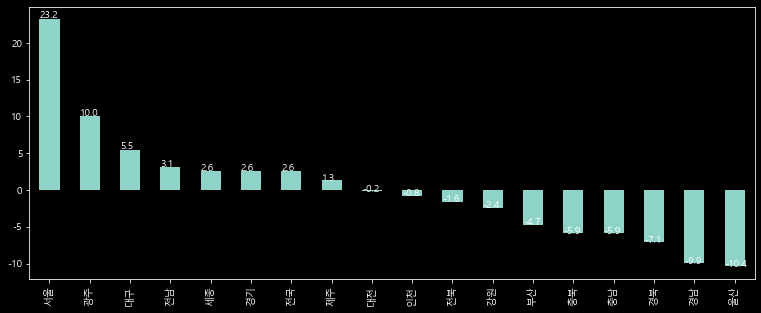

In [9]:
ax = KAB2_comp["2017.08-2018.09"].sort_values(ascending=False).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.01))

## 2018.09.13 ~ 2020.07 기간

In [10]:
KAB2_comp.sort_values(by=["2018.09-2020.07"], ascending=False)

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
세종,2.6,36.1,39.6,102.2
대전,-0.2,29.5,29.3,71.6
서울,23.2,20.7,48.8,141.5
경기,2.6,15.5,18.4,71.7
인천,-0.8,12.3,11.5,79.6
전국,2.6,10.2,13.1,82.6
대구,5.5,6.7,12.6,77.5
광주,10.0,5.9,16.5,113.7
부산,-4.7,5.2,0.3,103.4
울산,-10.4,4.6,-6.3,94.7


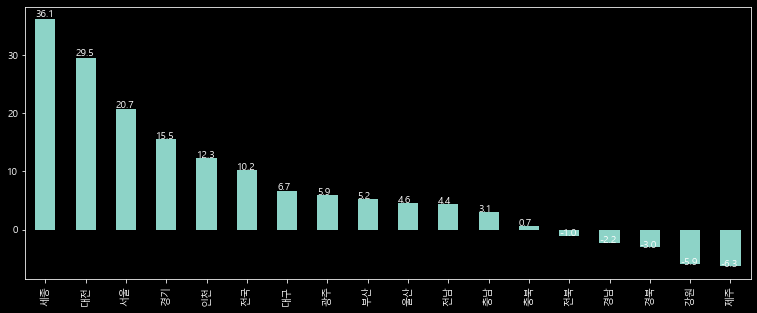

In [11]:
ax = KAB2_comp["2018.09-2020.07"].sort_values(ascending=False).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.01))

## 2017.08.02 ~ 2020.07 기간

In [12]:
KAB2_comp.sort_values(by=["2017.08-2020.07"], ascending=False)

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
서울,23.2,20.7,48.8,141.5
세종,2.6,36.1,39.6,102.2
대전,-0.2,29.5,29.3,71.6
경기,2.6,15.5,18.4,71.7
광주,10.0,5.9,16.5,113.7
전국,2.6,10.2,13.1,82.6
대구,5.5,6.7,12.6,77.5
인천,-0.8,12.3,11.5,79.6
전남,3.1,4.4,7.7,108.8
부산,-4.7,5.2,0.3,103.4


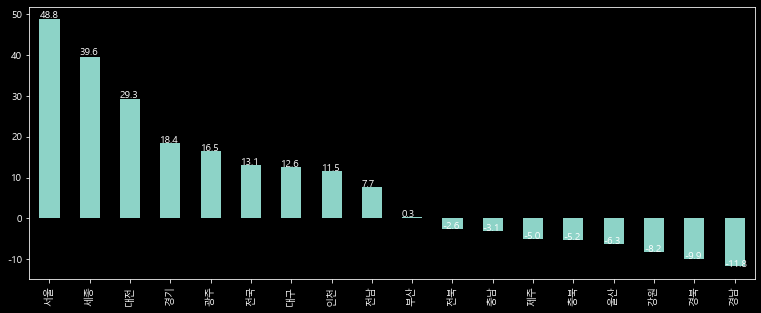

In [13]:
ax = KAB2_comp["2017.08-2020.07"].sort_values(ascending=False).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.01))

## 2006.01-2020.07 기간

In [14]:
KAB2_comp.sort_values(by=["2006.01-2020.07"], ascending=False)

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
서울,23.2,20.7,48.8,141.5
제주,1.3,-6.3,-5.0,139.0
광주,10.0,5.9,16.5,113.7
전남,3.1,4.4,7.7,108.8
부산,-4.7,5.2,0.3,103.4
세종,2.6,36.1,39.6,102.2
울산,-10.4,4.6,-6.3,94.7
전국,2.6,10.2,13.1,82.6
인천,-0.8,12.3,11.5,79.6
대구,5.5,6.7,12.6,77.5


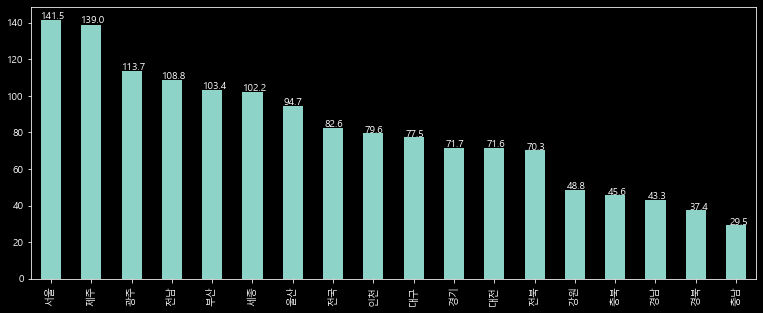

In [15]:
ax = KAB2_comp["2006.01-2020.07"].sort_values(ascending=False).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## 2017.08 - 2020.07 기간

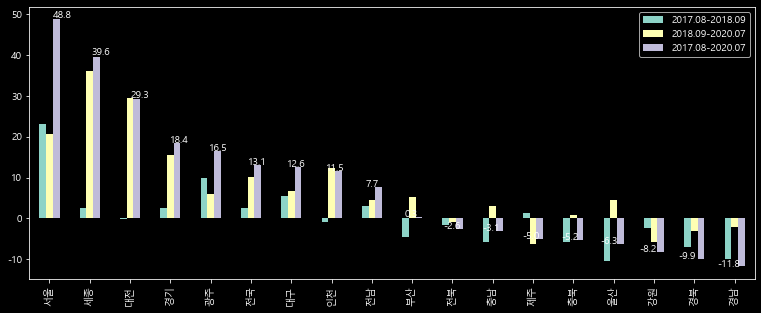

In [17]:
ax = KAB2_comp.iloc[:,0:3].sort_values(by=["2017.08-2020.07"],ascending=False).plot.bar()
for i, p in enumerate(ax.patches):
    if i >= KAB2_comp.shape[0]*2:
        ax.annotate(str(p.get_height()), (p.get_x() * 0.97, p.get_height() * 1.01))

## 2006.01 - 2020.07 기간

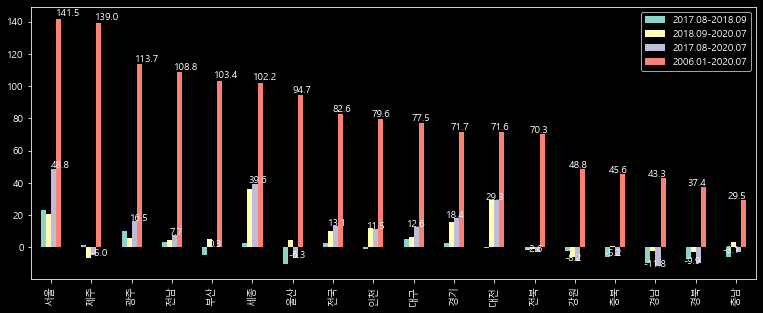

In [18]:
ax = KAB2_comp.sort_values(by=["2006.01-2020.07"],ascending=False).plot.bar()
for i, p in enumerate(ax.patches):
    if i >= KAB2_comp.shape[0]*2:
        ax.annotate(str(p.get_height()), (p.get_x() * 0.98, p.get_height() * 1.015))